In [8]:
import pandas as pd
import numpy as np

"""
# Dataset Documentation

## Overview

The dataset contains information on customers and their transactional behavior. The objective is to analyze the data to derive insights into customer churn and other behavioral patterns. It consists of 18 columns and 10,127 rows. Below is a detailed explanation of the columns:

## Column Descriptions

### Unnamed: 0

Type: Integer

Description: Index column, not relevant for analysis.

### customer_id

Type: Integer

Description: Unique identifier for each customer.

### churned

Type: Object

Description: Indicates whether the customer is an "Existing Customer" or a "Churned Customer."

### Customer_Age

Type: Integer

Description: Age of the customer.

### Gender

Type: Object

Description: Gender of the customer (e.g., "M" for Male, "F" for Female).

### Dependent_count

Type: Integer

Description: Number of dependents associated with the customer.

### Education_Level

Type: Object

Description: Educational qualification of the customer (e.g., "High School," "Graduate," "Uneducated").

### Marital_Status

Type: Object

Description: Marital status of the customer (e.g., "Married," "Single," "Unknown").

### Income_Category

Type: Object

Description: Income category of the customer (e.g., "$60K - $80K," "Less than $40K").

### Card_Category

Type: Object

Description: Type of credit card held by the customer (e.g., "Blue").

### Months_on_book

Type: Integer

Description: Duration (in months) the customer has been associated with the bank.

### Total_Relationship_Count

Type: Integer

Description: Total number of products/services the customer has with the bank.

### months_inactive

Type: Integer

Description: Number of months the customer was inactive.

### contacts_count

Type: Integer

Description: Number of contacts made with the customer in the last year.

### Avg_Open_To_Buy

Type: Float

Description: Average open-to-buy credit limit (remaining credit limit).

### Total_Trans_Amt

Type: Integer

Description: Total transaction amount made by the customer.

### transactions_count

Type: Integer

Description: Total number of transactions made by the customer.

### utilization_ratio

Type: Float

Description: Ratio of the amount used to the credit limit.
"""


In [9]:
df = pd.read_csv("bank_customers.csv")
df.head()

,Unnamed: 0,customer_id,churned,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,months_inactive,contacts_count,Avg_Open_To_Buy,Total_Trans_Amt,transactions_count,utilization_ratio
0,0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,11914.0,1144,42,0.061
1,1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,7392.0,1291,33,0.105
2,2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.000
3,3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,796.0,1171,20,0.760
4,4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10127 non-null  int64  
 1   customer_id               10127 non-null  int64  
 2   churned                   10127 non-null  object 
 3   Customer_Age              10127 non-null  int64  
 4   Gender                    10127 non-null  object 
 5   Dependent_count           10127 non-null  int64  
 6   Education_Level           10127 non-null  object 
 7   Marital_Status            10127 non-null  object 
 8   Income_Category           10127 non-null  object 
 9   Card_Category             10127 non-null  object 
 10  Months_on_book            10127 non-null  int64  
 11  Total_Relationship_Count  10127 non-null  int64  
 12  months_inactive           10127 non-null  int64  
 13  contacts_count            10127 non-null  int64  
 14  Avg_Op

# 1. Check for explicit missing values (NaN)


In [11]:

print("Missing values before handling:")
print(df.isnull().sum())



Missing values before handling:
Unnamed: 0                  0
customer_id                 0
churned                     0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
months_inactive             0
contacts_count              0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
transactions_count          0
utilization_ratio           0
dtype: int64


# Handle explicit nulls for numerical columns
# Using mean imputation

In [12]:

numerical_cols = ['Avg_Open_To_Buy', 'utilization_ratio', 'Total_Trans_Amt', 'transactions_count']
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].mean())  

# 3. Handle Implicit Nulls
# Replace placeholders like "Unknown" with "Other" or a separate category

In [ ]:
placeholder_value = "Unknown"
df[categorical_cols] = df[categorical_cols].replace(placeholder_value, "Other")

# Replace negative values with NaN

In [ ]:
invalid_cols = ['Avg_Open_To_Buy', 'utilization_ratio']

for col in invalid_cols:
    df[col] = df[col].apply(lambda x: np.nan if x < 0 else x)
    df[col] = df[col].fillna(df[col].mean())


In [ ]:
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Unnamed: 0                  0
customer_id                 0
churned                     0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
months_inactive             0
contacts_count              0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
transactions_count          0
utilization_ratio           0
dtype: int64


# Boxplot before handling outliers

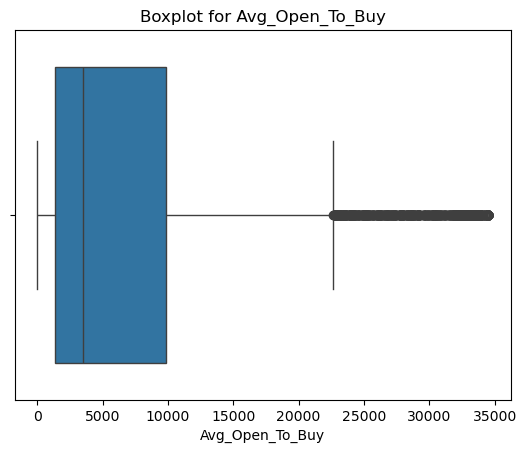

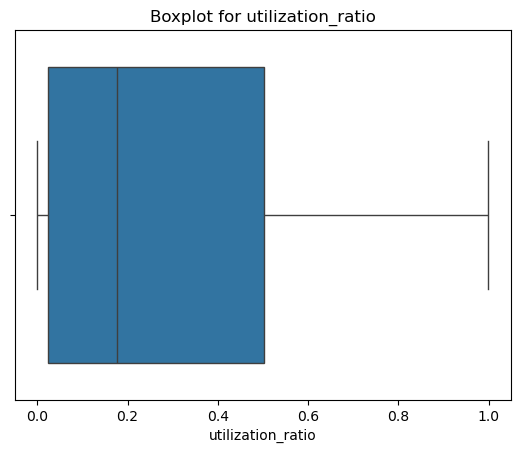

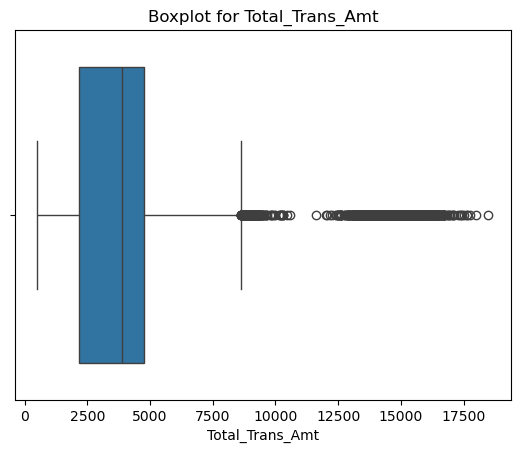

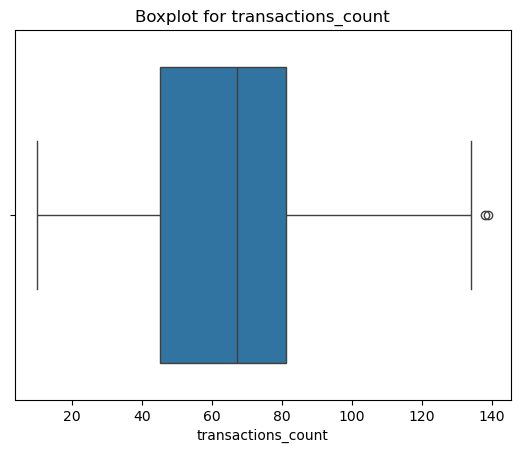

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

# Define numerical columns to check for outliers
# Define bounds for outliers
 # Remove outliers


In [ ]:
numerical_cols = ['Avg_Open_To_Buy', 'utilization_ratio', 'Total_Trans_Amt', 'transactions_count']


def handle_outliers(df, columns, method="remove"):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == "remove":
            # Remove outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        elif method == "cap":
            # Cap outliers
            df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

    return df

# Call the function to handle outliers (remove or cap)
df = handle_outliers(df, numerical_cols, method="remove")


# normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Define numerical columns to normalize
numerical_cols = ['Avg_Open_To_Buy', 'utilization_ratio', 'Total_Trans_Amt', 'transactions_count']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Verify the transformation
print(df[numerical_cols].describe())


       Avg_Open_To_Buy  utilization_ratio  Total_Trans_Amt  transactions_count
count      8436.000000        8436.000000      8436.000000         8436.000000
mean          0.211867           0.308102         0.371091            0.494041
std           0.229156           0.283312         0.201085            0.194193
min           0.000000           0.000000         0.000000            0.000000
25%           0.047395           0.000000         0.194958            0.320388
50%           0.113010           0.231231         0.397659            0.533981
75%           0.301442           0.556557         0.504406            0.650485
max           1.000000           1.000000         1.000000            1.000000


# one hot Encoder

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

categorical_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Use pandas get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


print(df_encoded.head())


   Unnamed: 0  customer_id            churned  Customer_Age  Dependent_count  \
0           0    768805383  Existing Customer            45                3   
1           1    818770008  Existing Customer            49                5   
2           2    713982108  Existing Customer            51                3   
3           3    769911858  Existing Customer            40                4   
4           4    709106358  Existing Customer            40                3   

   Months_on_book  Total_Relationship_Count  months_inactive  contacts_count  \
0              39                         5                1               3   
1              44                         6                1               2   
2              36                         4                1               0   
3              34                         3                4               1   
4              21                         5                1               0   

   Avg_Open_To_Buy  ...  Marital_Statu

In [ ]:
import numpy as np
# Feature: Average Transaction Value
df['Avg_Transaction_Value'] = df['Total_Trans_Amt'] / df['transactions_count']

# Feature: Inactivity Score
df['Inactivity_Score'] = df['months_inactive'] * df['contacts_count']

# Feature: Dependent Ratio
df['Dependent_Ratio'] = df['Dependent_count'] / df['Customer_Age']

# Binning: Customer Age into categories
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=[0, 25, 40, 55, 100], labels=['Youth', 'Young Adult', 'Middle Age', 'Senior'])

# Log Transformation for skewed variables
df['Log_Avg_Open_To_Buy'] = np.log1p(df['Avg_Open_To_Buy'])

# Check the new features
print(df[['Avg_Transaction_Value', 'Inactivity_Score', 'Dependent_Ratio', 'Age_Group', 'Log_Avg_Open_To_Buy']].head())


   Avg_Transaction_Value  Inactivity_Score  Dependent_Ratio    Age_Group  \
0               0.256884                 3         0.066667   Middle Age   
1               0.440272                 2         0.102041   Middle Age   
2               1.785385                 0         0.058824   Middle Age   
3               0.857037                 4         0.100000  Young Adult   
4               0.220418                 0         0.075000  Young Adult   

   Log_Avg_Open_To_Buy  
0             0.423130  
1             0.282739  
2             0.140648  
3             0.034467  
4             0.189314  


# Apply one-hot encoding to categorical columns

In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)

# Check the resulting dataframe
print(df_encoded.head())


   Unnamed: 0  customer_id  Customer_Age  Dependent_count  Months_on_book  \
0           0    768805383            45                3              39   
1           1    818770008            49                5              44   
2           2    713982108            51                3              36   
3           3    769911858            40                4              34   
4           4    709106358            40                3              21   

   Total_Relationship_Count  months_inactive  contacts_count  Avg_Open_To_Buy  \
0                         5                1               3         0.526732   
1                         6                1               2         0.326759   
2                         4                1               0         0.151019   
3                         3                4               1         0.035068   
4                         5                1               0         0.208420   

   Total_Trans_Amt  ...  Income_Category_$60K - $8

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2

# Check if the 'churned' column exists in the DataFrame
if 'churned' in df_encoded.columns:
    # Define the target and features (encoded)
    X = df_encoded.drop('churned', axis=1)  # Features (excluding the target)
    y = df_encoded['churned']  # Target variable

    # Apply the chi-squared test
    chi2_selector = SelectKBest(chi2, k='all')  # Select all features initially
    X_kbest = chi2_selector.fit_transform(X, y)

    # Get p-values for each feature
    p_values = chi2_selector.pvalues_

    # Create a DataFrame to view features and their p-values
    chi2_results = pd.DataFrame({
        'Feature': X.columns,
        'p-value': p_values
    })

    # Sort by p-value (ascending order)
    chi2_results = chi2_results.sort_values(by='p-value')

    # Display the results
    print(chi2_results)
else:
    print("The column 'churned' does not exist in the DataFrame.")

The column 'churned' does not exist in the DataFrame.


# Time-based features:

In [ ]:
# 1. Tenure in Years
df['Customer_Tenure_Years'] = df['Months_on_book'] / 12

# 2. Tenure Segmentation (Categorical)
df['Tenure_Category'] = pd.cut(df['Months_on_book'], bins=[0, 12, 36, 60, np.inf], labels=['New', 'Medium', 'Old', 'Very Old'])

# 3. Tenure in Quarters
df['Customer_Tenure_Quarters'] = df['Months_on_book'] // 3

# Example Output
print(df[['Customer_Tenure_Years', 'Tenure_Category', 'Customer_Tenure_Quarters']].head())


   Customer_Tenure_Years Tenure_Category  Customer_Tenure_Quarters
0               3.250000             Old                        13
1               3.666667             Old                        14
2               3.000000          Medium                        12
3               2.833333          Medium                        11
4               1.750000          Medium                         7


In [ ]:
# 4. Recency of Activity
df['Inactive_Recent'] = df['months_inactive'].apply(lambda x: 1 if x <= 6 else 0)  # Inactive for less than 6 months

# 5. Activity Recency Ratio (Months active vs inactive)
df['Activity_Recency_Ratio'] = df['Months_on_book'] / (df['months_inactive'] + 1)  # +1 to avoid division by zero

# Example Output
print(df[['Inactive_Recent', 'Activity_Recency_Ratio']].head())


   Inactive_Recent  Activity_Recency_Ratio
0                1                    19.5
1                1                    22.0
2                1                    18.0
3                1                     6.8
4                1                    10.5


In [ ]:
# 6. Average Transaction Frequency (per month)
df['Avg_Transaction_Frequency'] = df['transactions_count'] / df['Months_on_book']

# Example Output
print(df[['Avg_Transaction_Frequency']].head())


   Avg_Transaction_Frequency
0                   0.007966
1                   0.005075
2                   0.002697
3                   0.002856
4                   0.008322


# Data Partitioning for Spark:

In [ ]:
from pyspark.sql import SparkSession

# Create Spark session
spark = SparkSession.builder.appName("CustomerChurnPrediction").getOrCreate()

# Load the data 
df = spark.read.csv("bank_customers.csv", header=True, inferSchema=True)

# Repartition the data into multiple partitions for parallel processing
df = df.repartition(10)  # Example: repartition into 10 partitions

# Split the data into training, validation, and test sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=1234)  # 80% for training, 20% for testing
train_data, validation_data = train_data.randomSplit([0.8, 0.2], seed=1234)  # 80% of train data for training, 20% for validation

# Stratified sampling if dataset is imbalanced
fractions = {"Existing Customer": 0.8, "Churned": 0.8}
train_data = train_data.sampleBy("churned", fractions=fractions, seed=1234)

# Coalesce data to reduce partitions (before saving)
train_data = train_data.coalesce(1)  # Reduce to a single partition (useful before saving)

# Show the partitioned data for verification
train_data.show()



+---+-----------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+---------------+--------------+---------------+---------------+------------------+-----------------+
|_c0|customer_id|          churned|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|months_inactive|contacts_count|Avg_Open_To_Buy|Total_Trans_Amt|transactions_count|utilization_ratio|
+---+-----------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+---------------+--------------+---------------+---------------+------------------+-----------------+
| 27|  804424383|Existing Customer|          63|     M|              1|        Unknown|       Married|    $60K - $80K|         Blue|            56|                       3|         

In [ ]:
validation_data.show()


+----+-----------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+---------------+--------------+---------------+---------------+------------------+-----------------+
| _c0|customer_id|          churned|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|months_inactive|contacts_count|Avg_Open_To_Buy|Total_Trans_Amt|transactions_count|utilization_ratio|
+----+-----------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+---------------+--------------+---------------+---------------+------------------+-----------------+
|  53|  712813458|Existing Customer|          49|     M|              2|        Unknown|       Married|        $120K +|         Blue|            36|                       4|     

In [ ]:
test_data.show()

+---+-----------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+---------------+--------------+---------------+---------------+------------------+-----------------+
|_c0|customer_id|          churned|Customer_Age|Gender|Dependent_count|Education_Level|Marital_Status|Income_Category|Card_Category|Months_on_book|Total_Relationship_Count|months_inactive|contacts_count|Avg_Open_To_Buy|Total_Trans_Amt|transactions_count|utilization_ratio|
+---+-----------+-----------------+------------+------+---------------+---------------+--------------+---------------+-------------+--------------+------------------------+---------------+--------------+---------------+---------------+------------------+-----------------+
| 42|  773146383|Existing Customer|          50|     F|              1|        College|        Single|    $40K - $60K|       Silver|            43|                       3|         

# bulid model classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv("bank_customers.csv")

In [ ]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Education_Level'] = label_encoder.fit_transform(df['Education_Level'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])
df['Income_Category'] = label_encoder.fit_transform(df['Income_Category'])
df['Card_Category'] = label_encoder.fit_transform(df['Card_Category'])
df['churned'] = label_encoder.fit_transform(df['churned'])  # Target variable


In [ ]:
X = df[['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
        'months_inactive', 'contacts_count', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
        'transactions_count', 'utilization_ratio', 'Gender', 'Education_Level',
        'Marital_Status', 'Income_Category', 'Card_Category']]
y = df['churned']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


In [ ]:
# Feature scaling (important for models like Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Model selection and training: Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


# Accuracy

In [ ]:
# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.90


# Confusion Matrix

In [ ]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 169  150]
 [  62 1645]]


# Classification Report

In [ ]:
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.53      0.61       319
           1       0.92      0.96      0.94      1707

    accuracy                           0.90      2026
   macro avg       0.82      0.75      0.78      2026
weighted avg       0.89      0.90      0.89      2026



# Train the models on the training data using Spark's distributed computing capabilities.

In [ ]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StringIndexer, StandardScaler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

In [ ]:

# Step 1: Setup Spark session
spark = SparkSession.builder.appName("CustomerChurnPrediction").getOrCreate()

# Step 2: Load data (replace with your actual CSV path)
df = spark.read.csv("bank_customers.csv", header=True, inferSchema=True)


In [ ]:

# Step 3: Preprocessing - Index categorical columns
labelIndexer = StringIndexer(inputCol="churned", outputCol="label").fit(df)
df = labelIndexer.transform(df)

# Convert categorical columns to numeric using StringIndexer
indexers = [
    StringIndexer(inputCol="Gender", outputCol="Gender_index"),
    StringIndexer(inputCol="Education_Level", outputCol="Education_Level_index"),
    StringIndexer(inputCol="Marital_Status", outputCol="Marital_Status_index"),
    StringIndexer(inputCol="Income_Category", outputCol="Income_Category_index"),
    StringIndexer(inputCol="Card_Category", outputCol="Card_Category_index")
]



In [ ]:
# Apply the indexers to the dataframe
from pyspark.ml import Pipeline
pipeline = Pipeline(stages=indexers)
df = pipeline.fit(df).transform(df)

# Step 4: Feature engineering - Assemble features into a single vector
feature_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                'months_inactive', 'contacts_count', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
                'transactions_count', 'utilization_ratio', 'Gender_index', 'Education_Level_index',
                'Marital_Status_index', 'Income_Category_index', 'Card_Category_index']

assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
df = assembler.transform(df)


In [ ]:

# Step 5: Feature Scaling (Optional, but recommended for some models)
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
df = scaler.fit(df).transform(df)

# Step 6: Split the data into training and testing sets
train_data, test_data = df.randomSplit([0.8, 0.2], seed=1234)

# Step 7: Train the Logistic Regression model using Spark MLlib
lr = LogisticRegression(featuresCol="scaled_features", labelCol="label")


In [ ]:
# Train the model
lr_model = lr.fit(train_data)

# Step 8: Make predictions on the test data
predictions = lr_model.transform(test_data)

# Step 9: Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {accuracy:.2f}")

# Show the results (optional)
predictions.select("Customer_Age", "churned", "prediction", "probability").show(10)

Test Accuracy: 0.75
+------------+-----------------+----------+--------------------+
|Customer_Age|          churned|prediction|         probability|
+------------+-----------------+----------+--------------------+
|          49|Existing Customer|       0.0|[0.80320326425505...|
|          40|Existing Customer|       0.0|[0.88388878287849...|
|          62|Attrited Customer|       1.0|[0.03281352582925...|
|          54|Existing Customer|       1.0|[0.33735944897455...|
|          41|Existing Customer|       0.0|[0.63268498421275...|
|          59|Existing Customer|       0.0|[0.65148501925769...|
|          63|Existing Customer|       0.0|[0.76276341985858...|
|          55|Existing Customer|       0.0|[0.93132367495351...|
|          49|Existing Customer|       1.0|[0.43945505589812...|
|          59|Existing Customer|       0.0|[0.83999933652359...|
+------------+-----------------+----------+--------------------+
only showing top 10 rows



In [ ]:
lr = LogisticRegression(featuresCol="scaled_features", labelCol="label")

#  Create the parameter grid for hyperparameter tuning
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.01, 0.001])  # Regularization parameter (L2 penalty)
             .addGrid(lr.maxIter, [10, 20, 30])  # Maximum number of iterations
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])  # ElasticNet parameter (L1, L2 regularization)
             .build())


#  Create the evaluator
#  Setup the cross-validation with 3-fold cross-validation
#  Train the model using cross-validation

In [ ]:


evaluator = BinaryClassificationEvaluator(labelCol="label", rawPredictionCol="prediction")
crossval = CrossValidator(estimator=lr,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=3)  # 3-fold cross-validation
cvModel = crossval.fit(train_data)


In [ ]:

# Get the best model after cross-validation
bestModel = cvModel.bestModel
print("Best Model's Parameters:")
print(f"RegParam: {bestModel._java_obj.getRegParam()}")
print(f"MaxIter: {bestModel._java_obj.getMaxIter()}")
print(f"ElasticNetParam: {bestModel._java_obj.getElasticNetParam()}")

# Evaluate the best model on the test set
predictions = bestModel.transform(test_data)
accuracy = evaluator.evaluate(predictions)
print(f"Test Accuracy: {accuracy:.2f}")


predictions.select("Customer_Age", "churned", "prediction", "probability").show(10)


Best Model's Parameters:
RegParam: 0.001
MaxIter: 10
ElasticNetParam: 1.0
Test Accuracy: 0.74
+------------+-----------------+----------+--------------------+
|Customer_Age|          churned|prediction|         probability|
+------------+-----------------+----------+--------------------+
|          49|Existing Customer|       0.0|[0.83000993512562...|
|          40|Existing Customer|       0.0|[0.88955508396627...|
|          62|Attrited Customer|       1.0|[0.03808093513476...|
|          54|Existing Customer|       1.0|[0.36746056533722...|
|          41|Existing Customer|       0.0|[0.68705440971973...|
|          59|Existing Customer|       0.0|[0.68280831497117...|
|          63|Existing Customer|       0.0|[0.75750757259817...|
|          55|Existing Customer|       0.0|[0.93912558383142...|
|          49|Existing Customer|       1.0|[0.46325248719971...|
|          59|Existing Customer|       0.0|[0.86372105311414...|
+------------+-----------------+----------+------------------

# Tune hyperparameters to optimize model performance.

In [ ]:
from pyspark.sql.functions import col

# Ensure 'prediction' column is numeric (e.g., DoubleType)
predictions = predictions.withColumn("prediction", col("prediction").cast("double"))


In [ ]:
from pyspark.ml.feature import StringIndexer

# Encode 'churned' as numeric (0 or 1)
indexer = StringIndexer(inputCol="churned", outputCol="indexed_churned")
predictions = indexer.fit(predictions).transform(predictions)

# Use 'indexed_churned' as the label column for evaluation
evaluator = MulticlassClassificationEvaluator(labelCol="indexed_churned", predictionCol="prediction", metricName="accuracy")

accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.89


In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Check if 'indexed_churned' exists and drop it if it does
if 'indexed_churned' in predictions.columns:
    predictions = predictions.drop('indexed_churned')

# Encode 'churned' as numeric (0 or 1)
indexer = StringIndexer(inputCol="churned", outputCol="indexed_churned")
predictions = indexer.fit(predictions).transform(predictions)

# Use 'indexed_churned' as the label column for evaluation and calculate weightedPrecision
precision_evaluator = MulticlassClassificationEvaluator(labelCol="indexed_churned", predictionCol="prediction", metricName="weightedPrecision")

# Calculate Precision
precision = precision_evaluator.evaluate(predictions)

# Print precision
print(f"Precision: {precision:.2f}")


Precision: 0.88


In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Check if 'indexed_churned' exists and drop it if it does
if 'indexed_churned' in predictions.columns:
    predictions = predictions.drop('indexed_churned')

# Encode 'churned' as numeric (0 or 1)
indexer = StringIndexer(inputCol="churned", outputCol="indexed_churned")
predictions = indexer.fit(predictions).transform(predictions)

# Use 'indexed_churned' as the label column for evaluation and calculate weightedRecall
recall_evaluator = MulticlassClassificationEvaluator(labelCol="indexed_churned", predictionCol="prediction", metricName="weightedRecall")

# Calculate Recall
recall = recall_evaluator.evaluate(predictions)

# Print recall
print(f"Recall: {recall:.2f}")


Recall: 0.89


In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Check if 'indexed_churned' exists and drop it if it does
if 'indexed_churned' in predictions.columns:
    predictions = predictions.drop('indexed_churned')

# Encode 'churned' as numeric (0 or 1)
indexer = StringIndexer(inputCol="churned", outputCol="indexed_churned")
predictions = indexer.fit(predictions).transform(predictions)

# Use 'indexed_churned' as the label column for evaluation and calculate F1-Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="indexed_churned", predictionCol="prediction", metricName="f1")

# Calculate F1-Score
f1_score = f1_evaluator.evaluate(predictions)

# Print F1-Score
print(f"F1-Score: {f1_score:.2f}")


F1-Score: 0.88


In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Check if 'indexed_churned' exists and drop it if it does
if 'indexed_churned' in predictions.columns:
    predictions = predictions.drop('indexed_churned')

# Encode 'churned' as numeric (0 or 1)
indexer = StringIndexer(inputCol="churned", outputCol="indexed_churned")
predictions = indexer.fit(predictions).transform(predictions)

# Use BinaryClassificationEvaluator to calculate AUC
auc_evaluator = BinaryClassificationEvaluator(labelCol="indexed_churned", rawPredictionCol="prediction", metricName="areaUnderROC")

# Calculate AUC
auc = auc_evaluator.evaluate(predictions)

# Print AUC
print(f"AUC: {auc:.2f}")


AUC: 0.74


# Model Evaluation and Refinement:
# Evaluate model performance on the validation set using appropriate
# • Classification: (e.g., Accuracy, Precision, Recall, F1-score, AUC)

## data preprocessing

In [9]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

file_path = "bank_customers.csv"  # Replace with your file path
data = pd.read_csv(file_path)

# Drop unnecessary columns
data = data.drop(columns=["Unnamed: 0", "customer_id"], errors='ignore')

# Encode categorical variables
categorical_features = ['churned', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
label_encoded_features = ['churned', 'Gender']  # Binary categories
one_hot_encoded_features = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

# Initialize encoders
label_encoders = {}
for col in label_encoded_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# One-Hot Encoding for multi-class features
data = pd.get_dummies(data, columns=one_hot_encoded_features, drop_first=True)

# Feature scaling for numerical features
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                      'months_inactive', 'contacts_count', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
                      'transactions_count', 'utilization_ratio']

scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Feature engineering
data['Avg_Transaction_Amount'] = data['Total_Trans_Amt'] / (data['transactions_count'] + 1e-5)  # Avoid division by zero
data['Dependents_Per_Year'] = data['Dependent_count'] / (data['Months_on_book'] + 1e-5)

# Splitting dataset into train and test sets
X = data.drop(columns=['churned'])  # Replace 'churned' with your target column
y = data['churned']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data preprocessing completed!")


Data preprocessing completed!


# evaluate model

In [12]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)



# accuracy before evaluation =0.90
# accuracy after  evaluation =0.95

In [13]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.95


In [14]:

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       325
           1       0.96      0.99      0.97      1701

    accuracy                           0.95      2026
   macro avg       0.93      0.87      0.90      2026
weighted avg       0.95      0.95      0.95      2026



In [15]:

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Confusion Matrix:
[[ 248   77]
 [  25 1676]]


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc


# prepare data to visualization and check no missing value

In [28]:

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

# Fill missing values (example strategies)
df['Education_Level'].fillna('Unknown', inplace=True)
df['Avg_Open_To_Buy'].fillna(df['Avg_Open_To_Buy'].mean(), inplace=True)

# Ensure no missing values remain
assert df.isnull().sum().sum() == 0, "There are still missing values in the dataset!"


Missing values:
 Unnamed: 0                  0
customer_id                 0
churned                     0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
months_inactive             0
contacts_count              0
Avg_Open_To_Buy             0
Total_Trans_Amt             0
transactions_count          0
utilization_ratio           0
dtype: int64


<ipython-input-28-09677d71c7d6>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Education_Level'].fillna('Unknown', inplace=True)
<ipython-input-28-09677d71c7d6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

# 1. Histogram for numerical columns

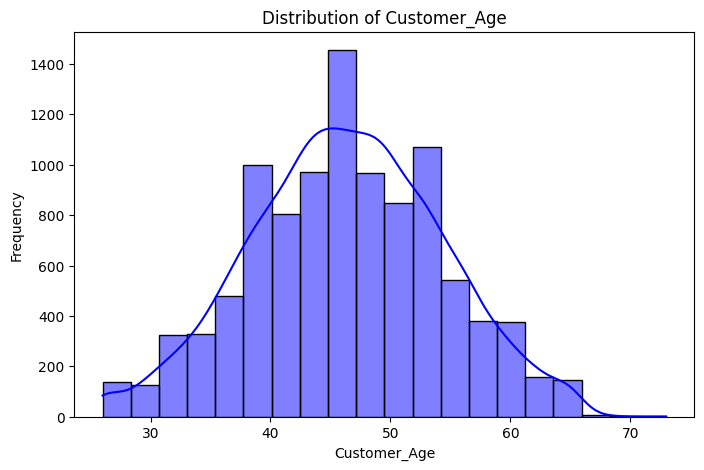

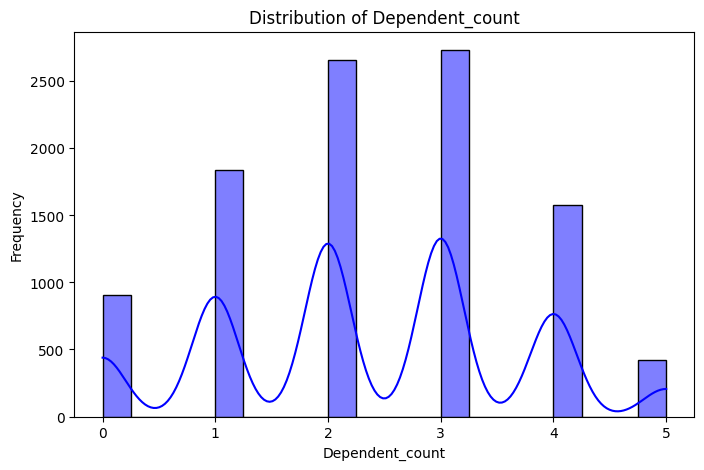

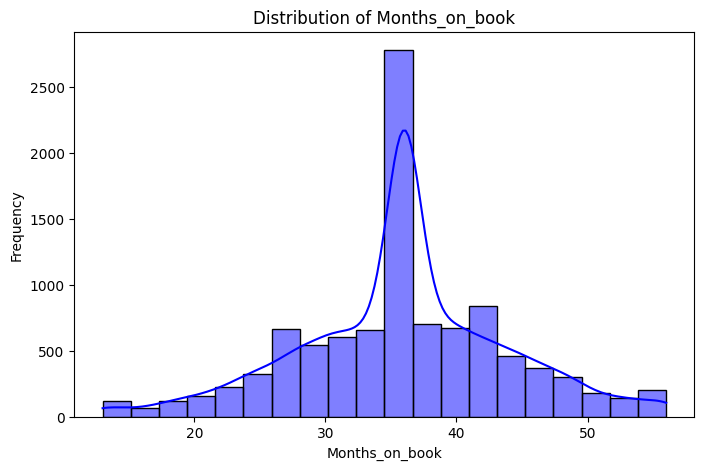

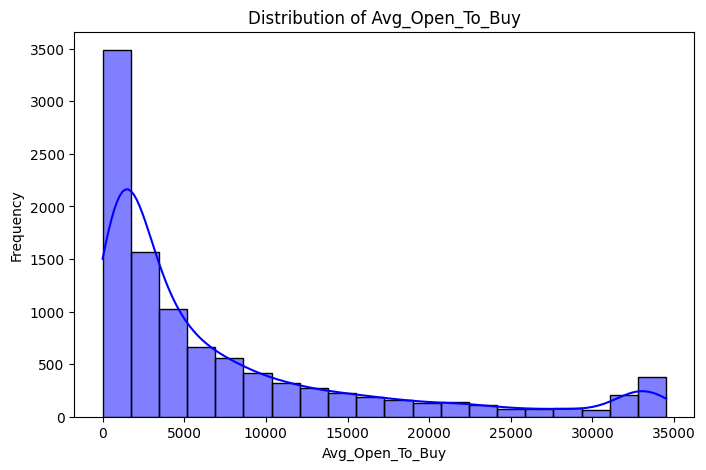

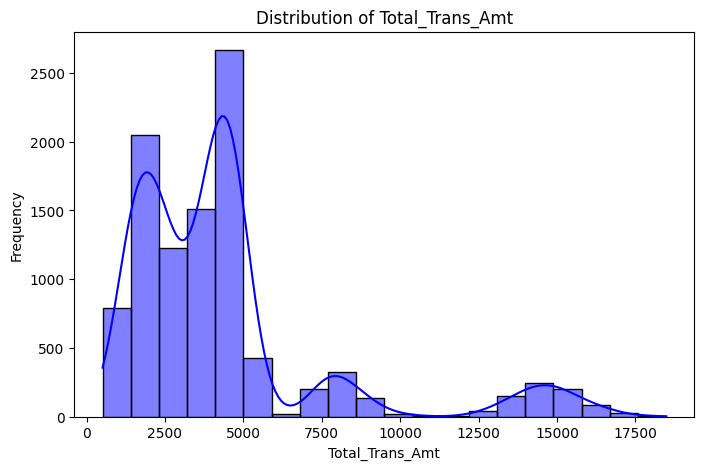

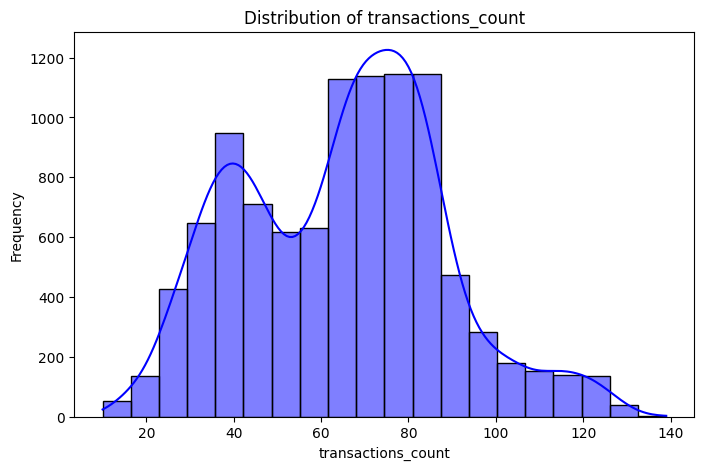

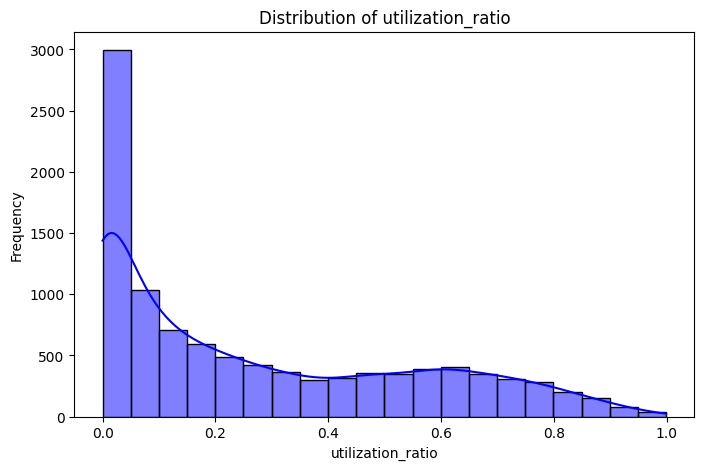

In [29]:
numerical_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book',
                     'Avg_Open_To_Buy', 'Total_Trans_Amt', 'transactions_count', 'utilization_ratio']

for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=20, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

<ipython-input-30-14c036207317>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


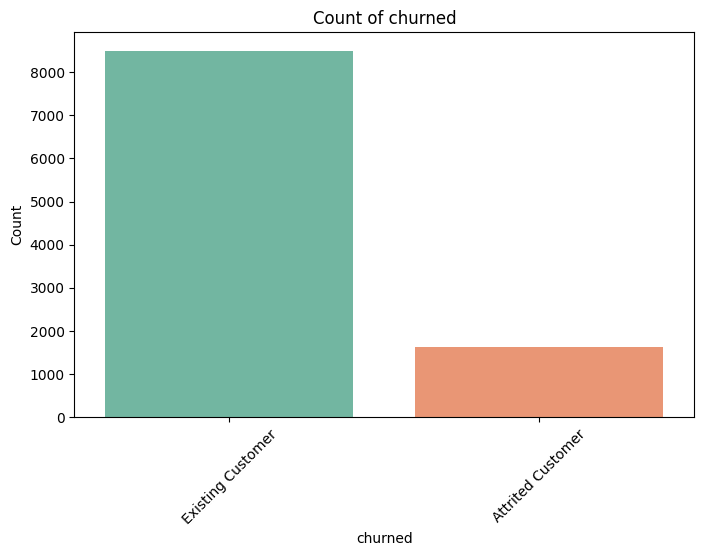

<ipython-input-30-14c036207317>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


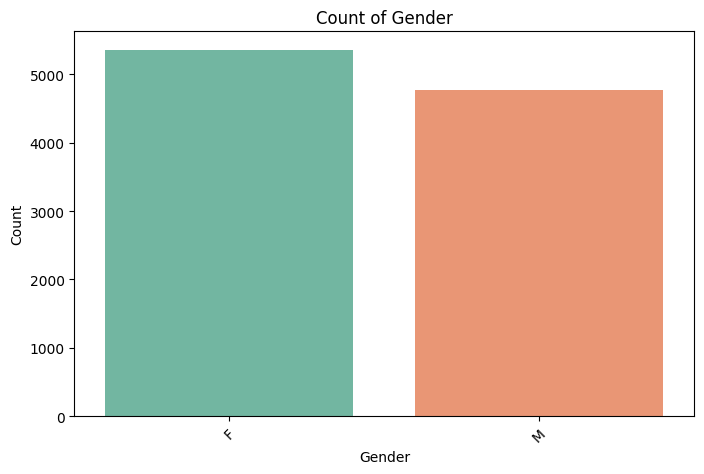

<ipython-input-30-14c036207317>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


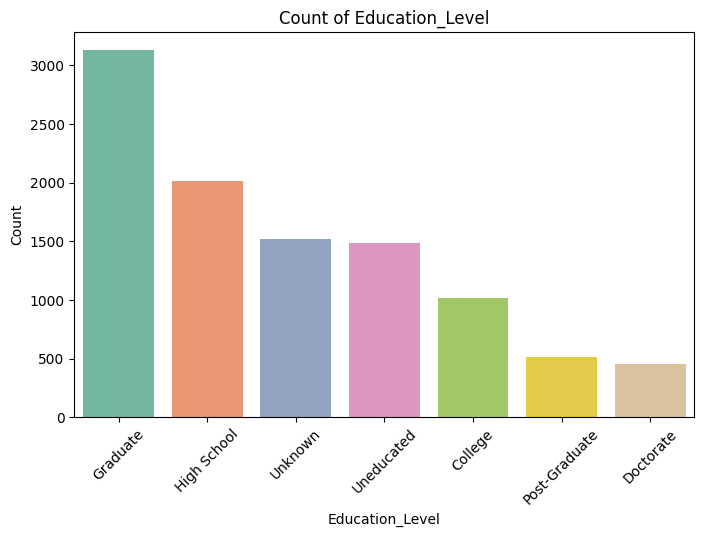

<ipython-input-30-14c036207317>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


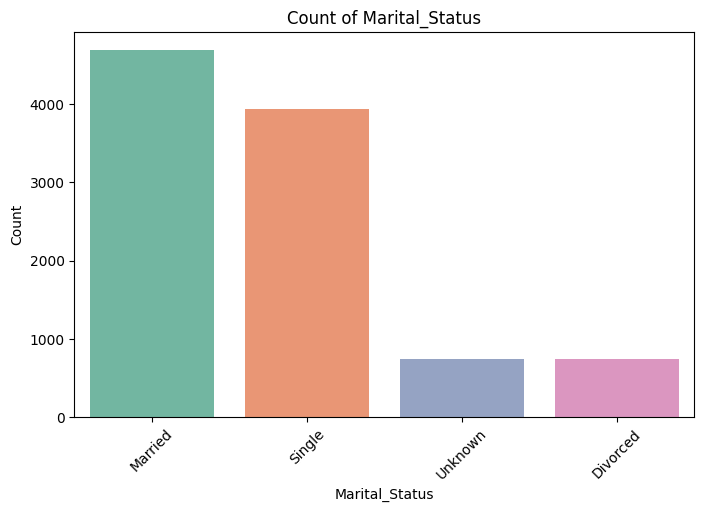

<ipython-input-30-14c036207317>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


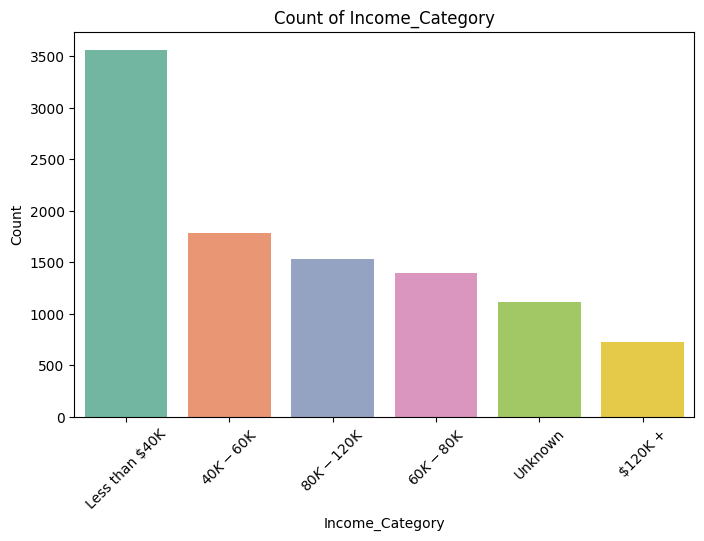

<ipython-input-30-14c036207317>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)


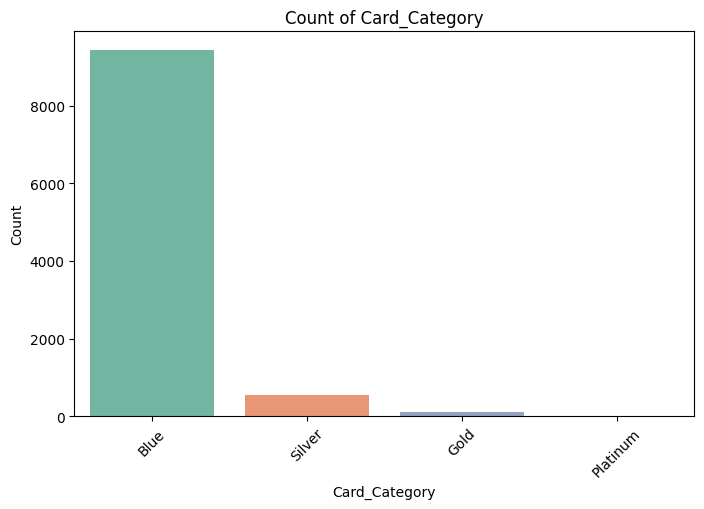

In [30]:
categorical_columns = ['churned', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# 3. Scatter plot: Avg_Open_To_Buy vs. Total_Trans_Amt

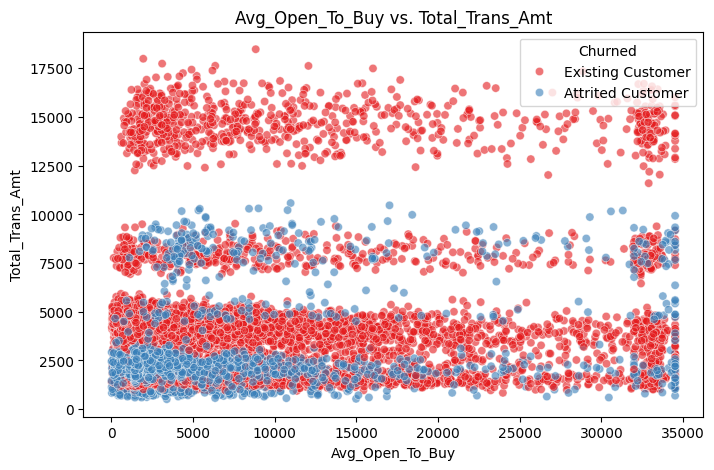

In [31]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Avg_Open_To_Buy', y='Total_Trans_Amt', hue='churned', palette='Set1', alpha=0.6)
plt.title('Avg_Open_To_Buy vs. Total_Trans_Amt')
plt.xlabel('Avg_Open_To_Buy')
plt.ylabel('Total_Trans_Amt')
plt.legend(title='Churned')
plt.show()